Testing the lower bound graph

In [1]:
from large_gcs.contact.contact_regions_set import ContactRegionParams
from large_gcs.graph_generators.contact_graph_generator import ContactGraphGenerator, ContactGraphGeneratorParams
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.graph_generators.contact_graph_generator import ContactGraphGeneratorParams
import logging
logging.basicConfig(level=logging.WARN)
logging.getLogger("large_gcs").setLevel(logging.DEBUG)
logging.getLogger("large_gcs.geometry.convex_set").setLevel(logging.INFO)
logger = logging.getLogger(__name__)
import numpy as np
import matplotlib.pyplot as plt


INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 1 body pairs...
100%|██████████| 1/1 [00:00<00:00, 149.84it/s]
INFO:large_gcs.graph.contact_graph:Loading 4 contact pair modes for 2 bodies...
INFO:large_gcs.graph.contact_graph:Generating contact sets for 4 sets...
  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 2292.28it/s]
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 6/6 [00:00<00:00, 15592.21it/s]
INFO:large_gcs.graph.graph:Adding 6 vertices to graph...
100%|██████████| 6/6 [00:00<00:00, 18993.07it/s]
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 11/11 [00:00<00:00, 16740.69it/s]
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 11/11 [00:00<00:00, 9820.64it/s]
INFO:large_gcs.graph.graph:Adding 11 edges to graph...
100%|██████████| 11/11 [00:00<00:00, 10531.24it/s]
INFO:large_gcs.graph.contact_graph:Created contact graph: GraphParams(dim_bounds=(2, 6), n_vertices=6, n_edges=11, source=[array([-2, -2])], target='regions', workspace=array([[-3,  3],
       [-3,  3]]), default_costs_constraints=None)


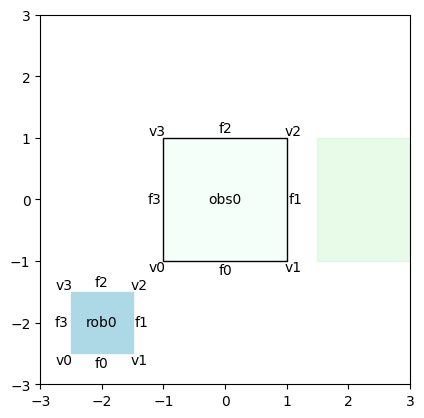

In [2]:
graph_name = "cg_simple_1_1"
graph_file = ContactGraphGeneratorParams.graph_file_path_from_name(
    graph_name
)
cg = ContactGraph.load_from_file(
    graph_file,
    should_use_l1_norm_vertex_cost=True,
)
cg.plot()

In [3]:
from large_gcs.graph.lower_bound_graph import LowerBoundGraph


lbg=LowerBoundGraph.load_from_name(graph_name)

('NC|obs0_f0-rob0_f2',)


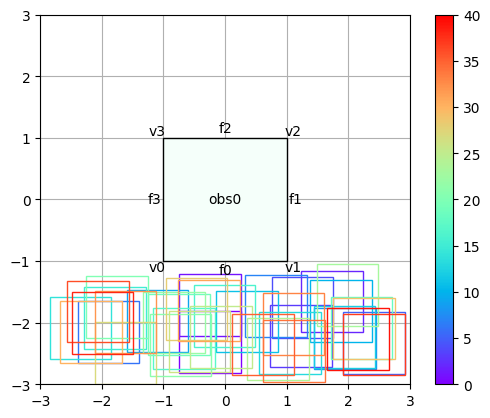

('NC|obs0_f1-rob0_f3',)


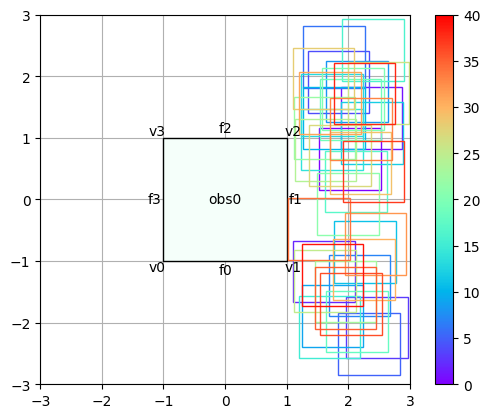

('NC|obs0_f2-rob0_f0',)


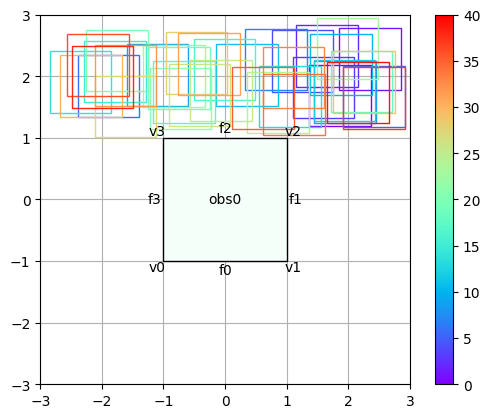

('NC|obs0_f3-rob0_f1',)


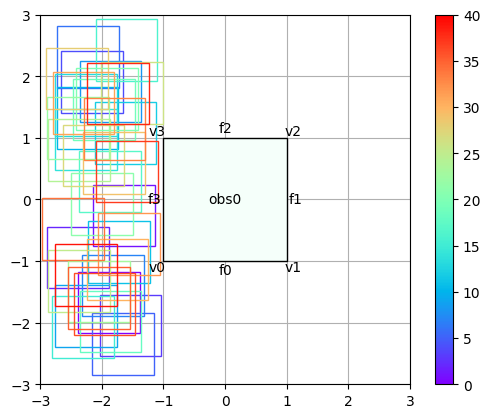

INFO:large_gcs.graph.contact_graph:skipping sampling for source as it is a contact point set


source
target


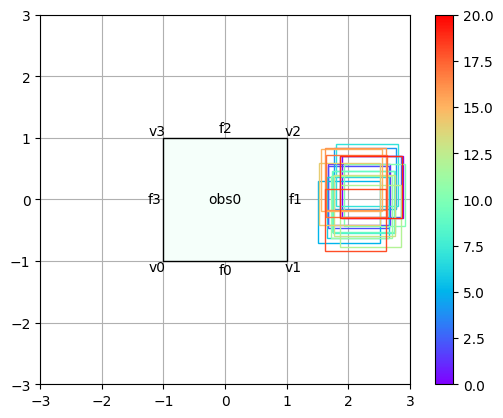

In [4]:
for v in cg.vertices:
    print(v)
    cg.generate_and_plot_samples_in_set(v, 20)

In [5]:
lbg._parent_vertex_to_vertices["target"]

[LBGVertex(parent_triple=("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)", 'target'), parent_vertex='target', point=array([ 2. , -0.5])),
 LBGVertex(parent_triple=("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)", 'target'), parent_vertex='target', point=array([2. , 0.5]))]

In [6]:
lbg.run_dijkstra()

INFO:large_gcs.graph.lower_bound_graph:Finished Dijkstra in 0.0010340213775634766 seconds
INFO:large_gcs.graph.lower_bound_graph:duration in H:M:S 00:00:00


In [7]:
len(lbg._g)

28

In [8]:
len([c for c in lbg._edges.values() if c>0])

24

5.0: (("('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f3-rob0_f1',)"), "('NC|obs0_f1-rob0_f3',)") -> (("('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f3-rob0_f1',)"), "('NC|obs0_f3-rob0_f1',)")


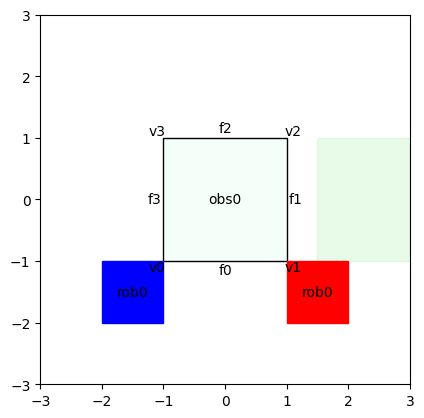

5.0: (("('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f3-rob0_f1',)"), "('NC|obs0_f3-rob0_f1',)") -> (("('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f3-rob0_f1',)"), "('NC|obs0_f1-rob0_f3',)")


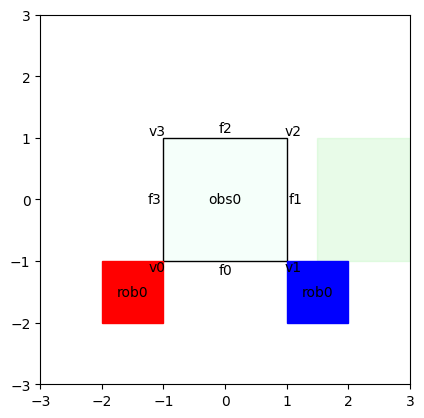

5.0: (("('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)"), "('NC|obs0_f3-rob0_f1',)") -> (("('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)"), "('NC|obs0_f1-rob0_f3',)")


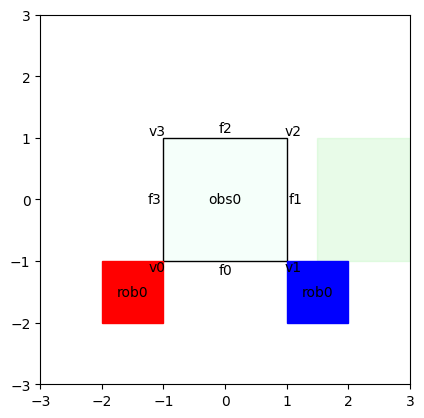

5.0: (("('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)"), "('NC|obs0_f1-rob0_f3',)") -> (("('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)"), "('NC|obs0_f3-rob0_f1',)")


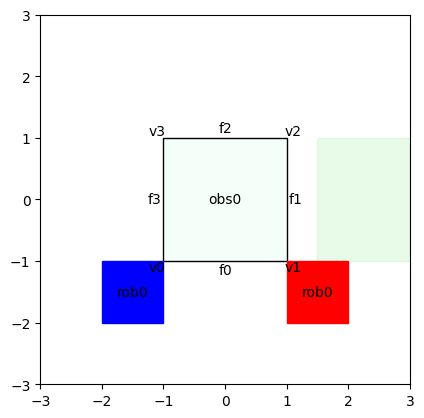

5.5: (('source', "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)"), 'source') -> (('source', "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)"), "('NC|obs0_f1-rob0_f3',)")


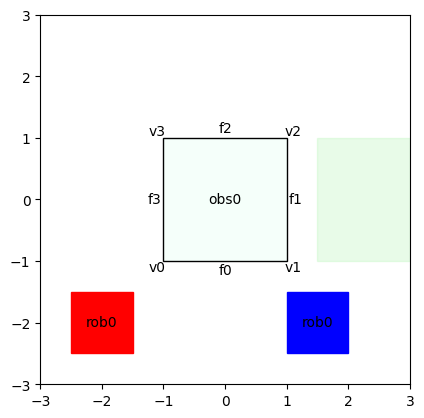

5.5: (('source', "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)"), "('NC|obs0_f1-rob0_f3',)") -> (('source', "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)"), 'source')


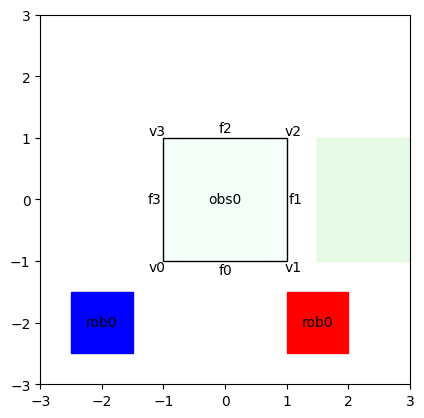

5.0: (("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f2-rob0_f0',)"), "('NC|obs0_f0-rob0_f2',)") -> (("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f2-rob0_f0',)"), "('NC|obs0_f2-rob0_f0',)")


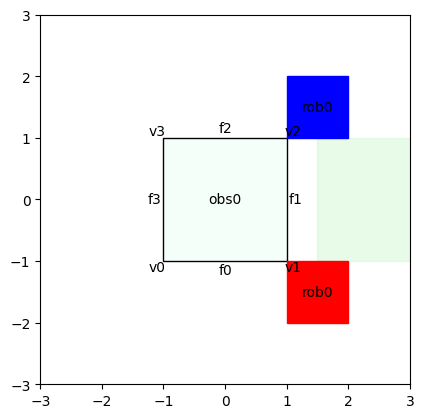

5.0: (("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f2-rob0_f0',)"), "('NC|obs0_f2-rob0_f0',)") -> (("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f2-rob0_f0',)"), "('NC|obs0_f0-rob0_f2',)")


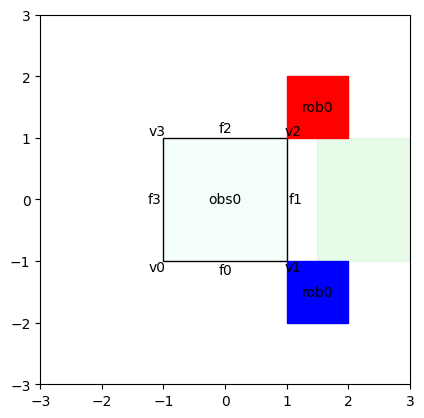

2.9999999999999956: (("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)", 'target'), "('NC|obs0_f0-rob0_f2',)") -> (("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)", 'target'), 'target')


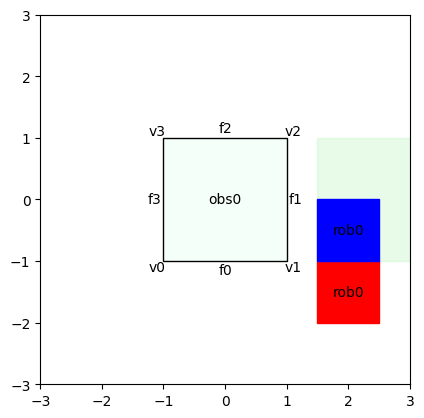

2.9999999999999956: (("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)", 'target'), 'target') -> (("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)", 'target'), "('NC|obs0_f0-rob0_f2',)")


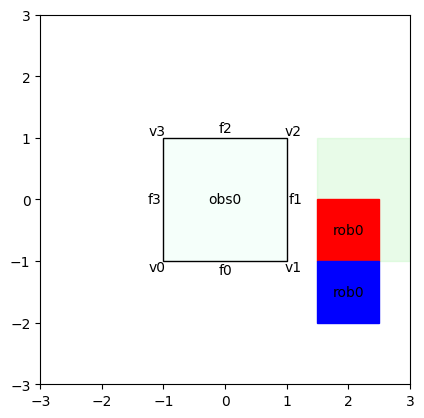

5.0: (("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f0-rob0_f2',)"), "('NC|obs0_f2-rob0_f0',)") -> (("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f0-rob0_f2',)"), "('NC|obs0_f0-rob0_f2',)")


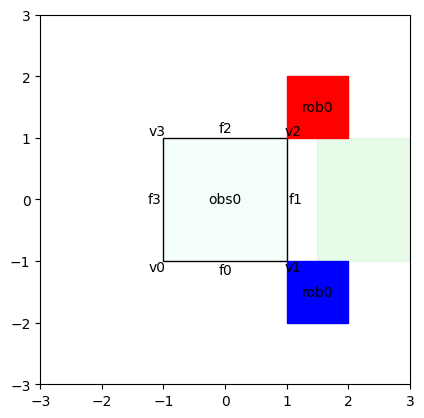

5.0: (("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f0-rob0_f2',)"), "('NC|obs0_f0-rob0_f2',)") -> (("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f0-rob0_f2',)"), "('NC|obs0_f2-rob0_f0',)")


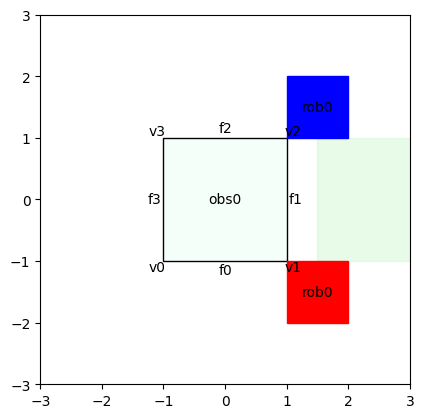

2.9999999999999956: (("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)", 'target'), "('NC|obs0_f2-rob0_f0',)") -> (("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)", 'target'), 'target')


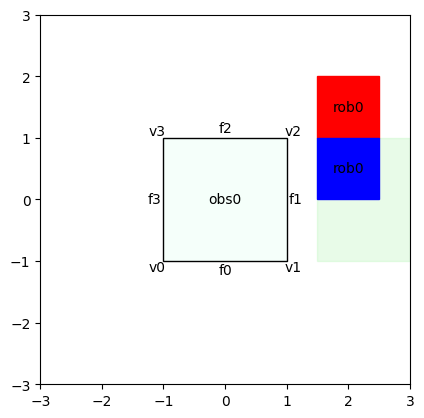

2.9999999999999956: (("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)", 'target'), 'target') -> (("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)", 'target'), "('NC|obs0_f2-rob0_f0',)")


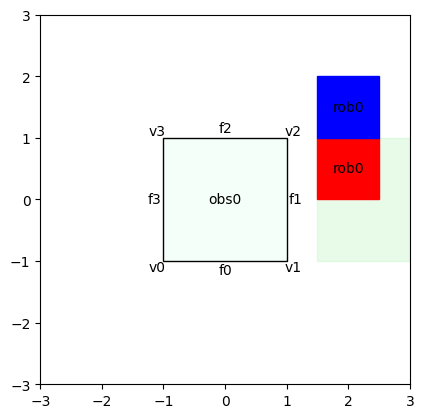

5.0: (("('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f3-rob0_f1',)"), "('NC|obs0_f1-rob0_f3',)") -> (("('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f3-rob0_f1',)"), "('NC|obs0_f3-rob0_f1',)")


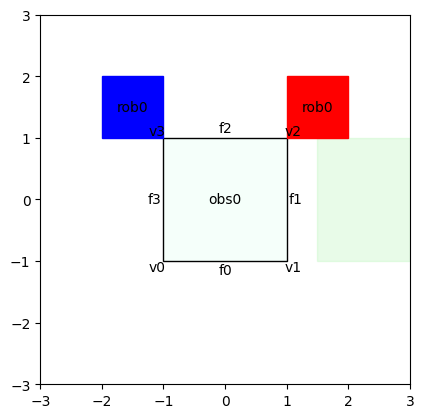

5.0: (("('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f3-rob0_f1',)"), "('NC|obs0_f3-rob0_f1',)") -> (("('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f3-rob0_f1',)"), "('NC|obs0_f1-rob0_f3',)")


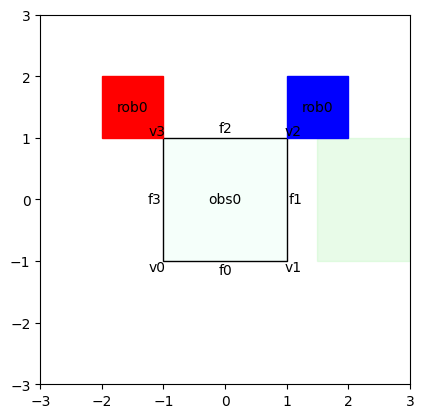

5.0: (("('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)"), "('NC|obs0_f3-rob0_f1',)") -> (("('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)"), "('NC|obs0_f1-rob0_f3',)")


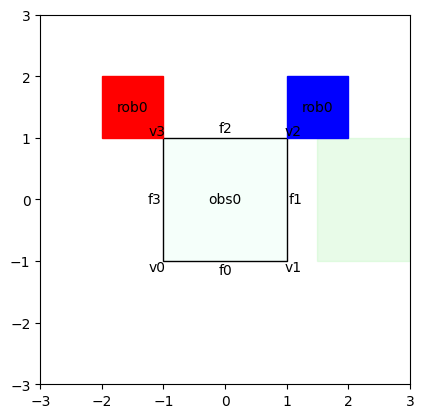

5.0: (("('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)"), "('NC|obs0_f1-rob0_f3',)") -> (("('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)"), "('NC|obs0_f3-rob0_f1',)")


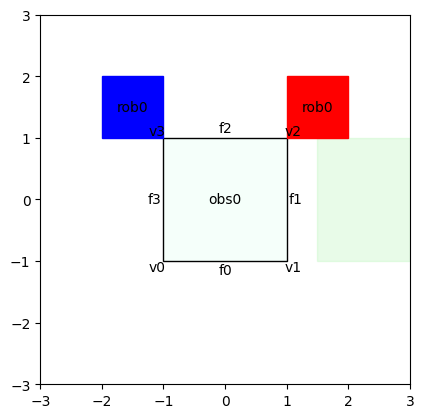

5.0: (("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)"), "('NC|obs0_f0-rob0_f2',)") -> (("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)"), "('NC|obs0_f2-rob0_f0',)")


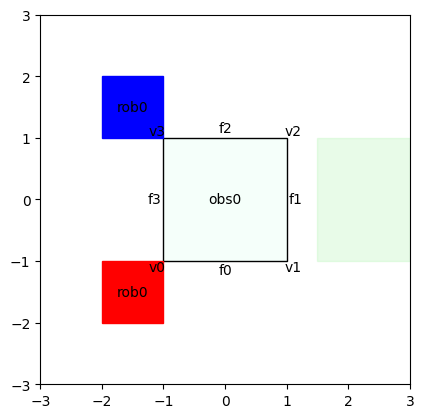

5.0: (("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)"), "('NC|obs0_f2-rob0_f0',)") -> (("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)"), "('NC|obs0_f0-rob0_f2',)")


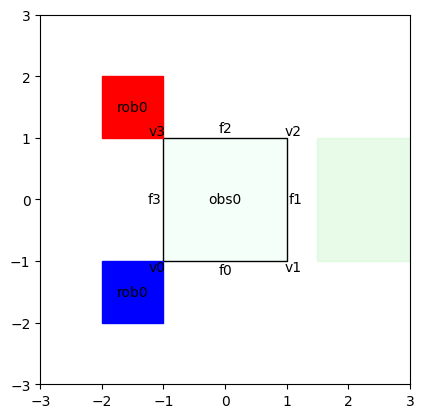

5.0: (("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f0-rob0_f2',)"), "('NC|obs0_f2-rob0_f0',)") -> (("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f0-rob0_f2',)"), "('NC|obs0_f0-rob0_f2',)")


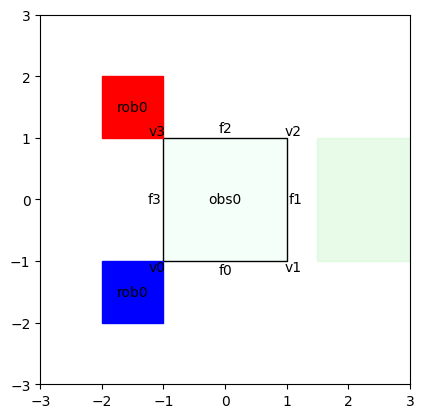

5.0: (("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f0-rob0_f2',)"), "('NC|obs0_f0-rob0_f2',)") -> (("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f0-rob0_f2',)"), "('NC|obs0_f2-rob0_f0',)")


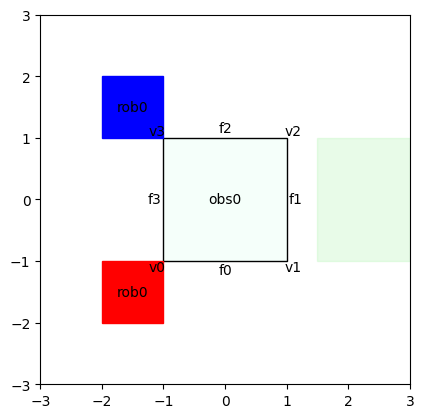

5.5: (('source', "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)"), 'source') -> (('source', "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)"), "('NC|obs0_f2-rob0_f0',)")


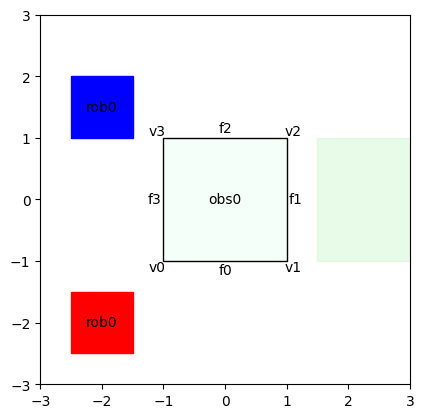

5.5: (('source', "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)"), "('NC|obs0_f2-rob0_f0',)") -> (('source', "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)"), 'source')


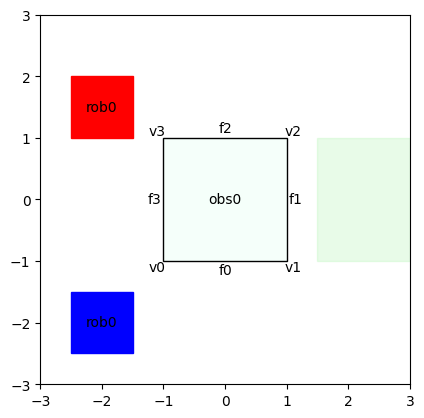

In [10]:
for (u, v), c in lbg._edges.items():
    if c == 0:
        continue
    print(f"{c}: {u} -> {v}")
    pos_v = lbg._vertices[v].point
    pos_u = lbg._vertices[u].point
    cg.plot(show_source=False)
    cg.robots[0].plot_at_position(pos_u, color="red")
    cg.robots[0].plot_at_position(pos_v, color="blue")
    plt.show()

In [ ]:
len(lbg._parent_vertex_to_vertices["target"])

12

In [ ]:
lbg._parent_vertex_to_vertices["target"]

[LBGVertex(parent_triple=("('IC|obj0_f3-rob0_f1',)", "('IC|obj0_f0-rob0_f2',)", 'target'), parent_vertex='target', point=array([ 2. , -0.5,  1. , -1.5])),
 LBGVertex(parent_triple=("('NC|obj0_f0-rob0_f2',)", "('IC|obj0_f0-rob0_f2',)", 'target'), parent_vertex='target', point=array([ 2. ,  0.5,  1. , -0.5])),
 LBGVertex(parent_triple=("('NC|obj0_f3-rob0_f1',)", "('IC|obj0_f0-rob0_f2',)", 'target'), parent_vertex='target', point=array([ 2. , -0.5,  1. , -1.5])),
 LBGVertex(parent_triple=("('IC|obj0_f3-rob0_f1',)", "('IC|obj0_f2-rob0_f0',)", 'target'), parent_vertex='target', point=array([2. , 0.5, 1. , 1.5])),
 LBGVertex(parent_triple=("('NC|obj0_f2-rob0_f0',)", "('IC|obj0_f2-rob0_f0',)", 'target'), parent_vertex='target', point=array([2. , 0.5, 1. , 1.5])),
 LBGVertex(parent_triple=("('NC|obj0_f3-rob0_f1',)", "('IC|obj0_f2-rob0_f0',)", 'target'), parent_vertex='target', point=array([2. , 0.5, 1. , 1.5])),
 LBGVertex(parent_triple=("('IC|obj0_f0-rob0_f2',)", "('NC|obj0_f0-rob0_f2',)", 't

In [13]:
# How many g values are greater than 0?
nonzero_cost_vertices = [(key,x) for (key,x) in lbg._g.items() if x > 0]
print(len(nonzero_cost_vertices))

26


In [15]:
sorted_vertices = sorted(nonzero_cost_vertices, key=lambda x: x[1])

[ 1.5 -1.5] 2.9999999999999956 (("('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f3-rob0_f1',)"), "('NC|obs0_f1-rob0_f3',)")


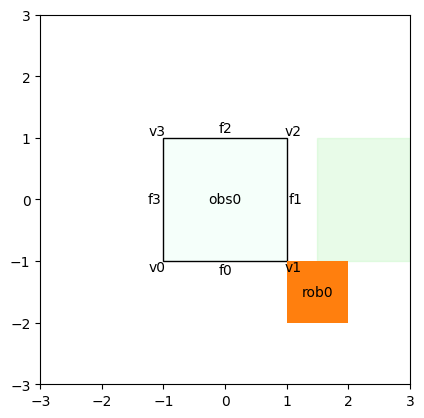

[ 1.5 -1.5] 2.9999999999999956 (("('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)"), "('NC|obs0_f1-rob0_f3',)")


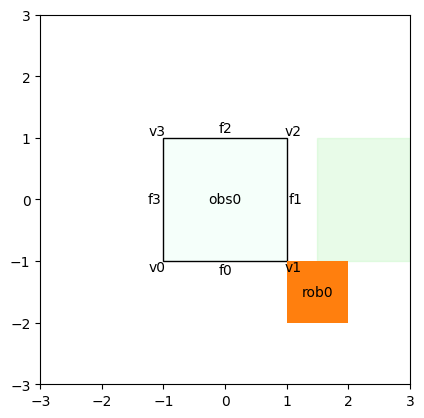

[ 1.5 -2. ] 2.9999999999999956 (('source', "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)"), "('NC|obs0_f1-rob0_f3',)")


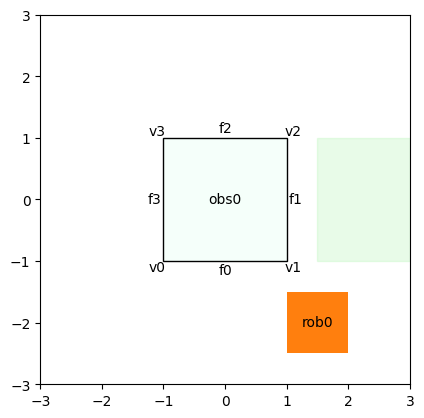

[ 1.5 -1.5] 2.9999999999999956 (("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f2-rob0_f0',)"), "('NC|obs0_f0-rob0_f2',)")


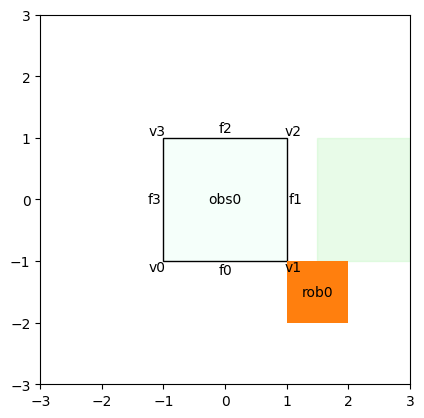

[1.5 1.5] 2.9999999999999956 (("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f2-rob0_f0',)"), "('NC|obs0_f2-rob0_f0',)")


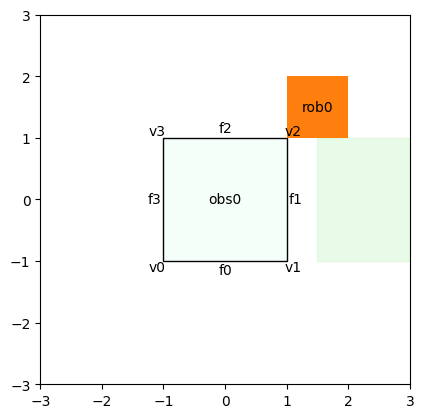

[ 2.  -1.5] 2.9999999999999956 (("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)", 'target'), "('NC|obs0_f0-rob0_f2',)")


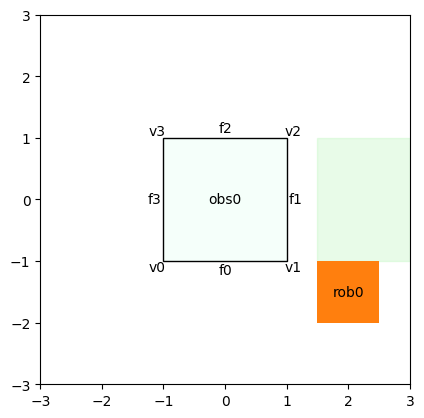

[1.5 1.5] 2.9999999999999956 (("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f0-rob0_f2',)"), "('NC|obs0_f2-rob0_f0',)")


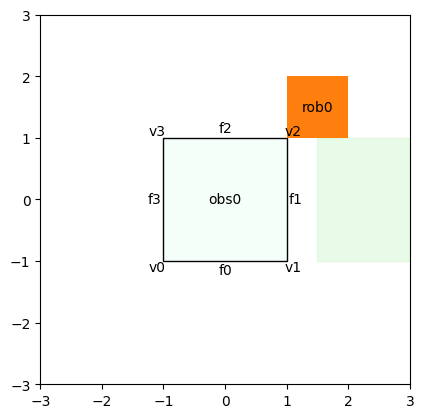

[ 1.5 -1.5] 2.9999999999999956 (("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f0-rob0_f2',)"), "('NC|obs0_f0-rob0_f2',)")


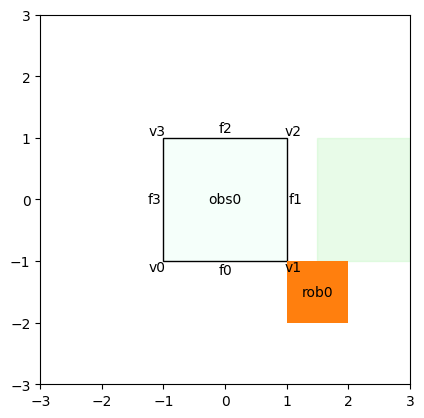

[2.  1.5] 2.9999999999999956 (("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)", 'target'), "('NC|obs0_f2-rob0_f0',)")


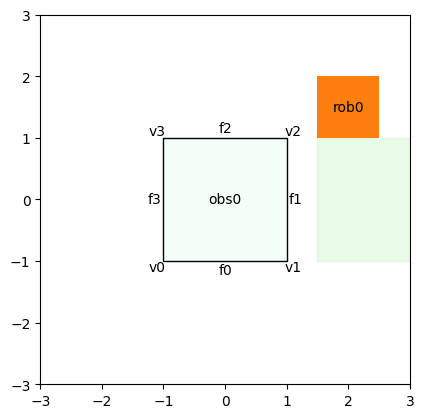

[1.5 1.5] 2.9999999999999956 (("('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f3-rob0_f1',)"), "('NC|obs0_f1-rob0_f3',)")


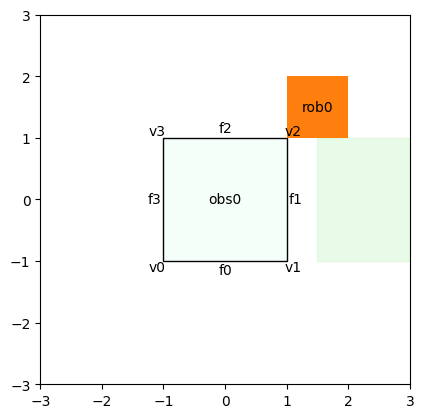

[1.5 1.5] 2.9999999999999956 (("('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)"), "('NC|obs0_f1-rob0_f3',)")


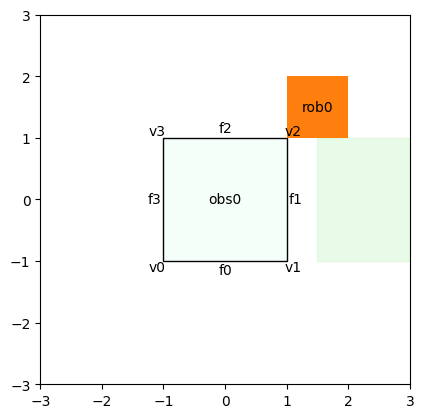

[-1.5 -1.5] 7.999999999999996 (("('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f3-rob0_f1',)"), "('NC|obs0_f3-rob0_f1',)")


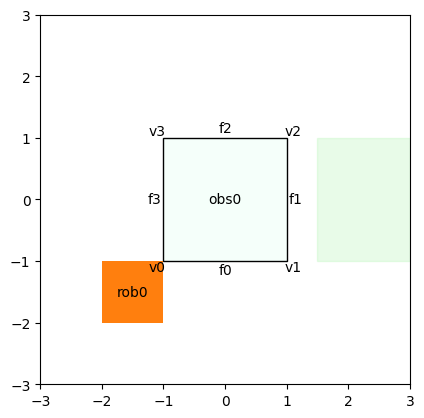

[-1.5 -1.5] 7.999999999999996 (("('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)"), "('NC|obs0_f3-rob0_f1',)")


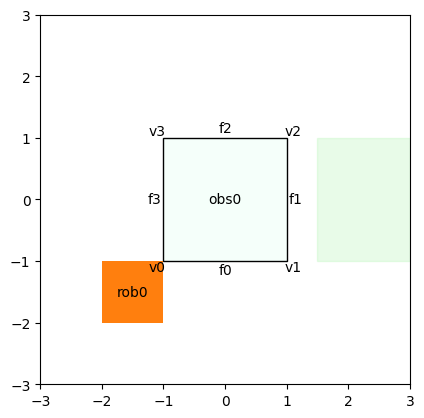

[-2. -2.] 7.999999999999996 (('source', "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f1-rob0_f3',)"), 'source')


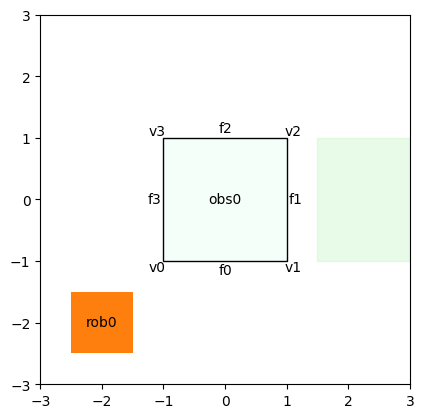

[-2. -2.] 7.999999999999996 (('source', "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f3-rob0_f1',)"), 'source')


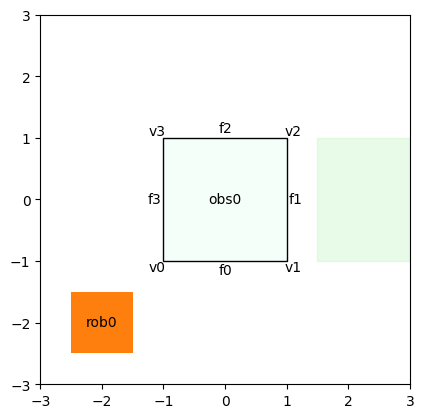

[-2. -2.] 7.999999999999996 (('source', "('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f3-rob0_f1',)"), "('NC|obs0_f3-rob0_f1',)")


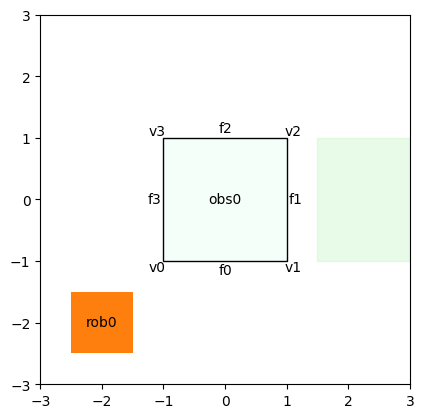

[-1.5  1.5] 7.999999999999996 (("('NC|obs0_f1-rob0_f3',)", "('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f3-rob0_f1',)"), "('NC|obs0_f3-rob0_f1',)")


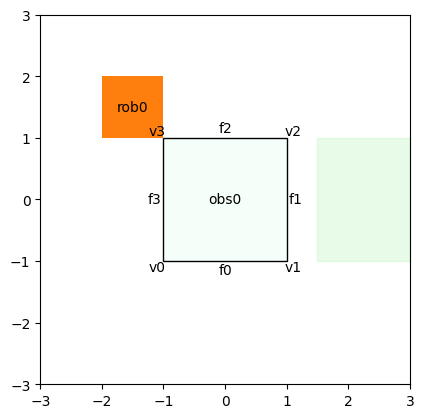

[-1.5  1.5] 7.999999999999996 (("('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f1-rob0_f3',)"), "('NC|obs0_f3-rob0_f1',)")


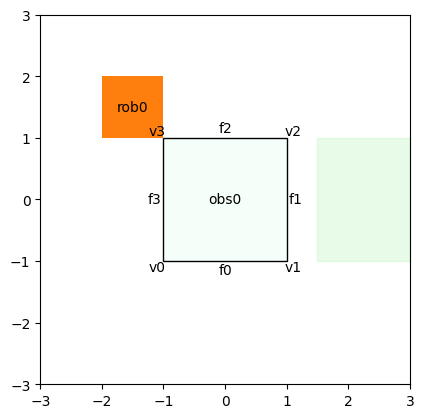

[-1.5 -1.5] 7.999999999999996 (("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)"), "('NC|obs0_f0-rob0_f2',)")


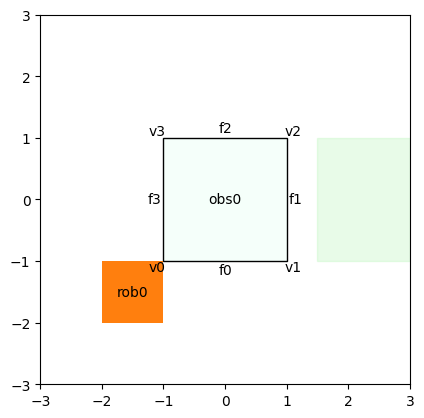

[-1.5  1.5] 7.999999999999996 (("('NC|obs0_f0-rob0_f2',)", "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)"), "('NC|obs0_f2-rob0_f0',)")


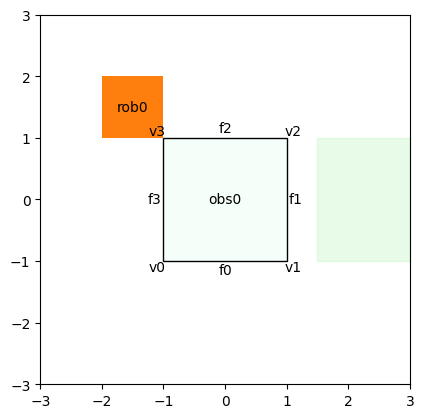

[-1.5  1.5] 7.999999999999996 (("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f0-rob0_f2',)"), "('NC|obs0_f2-rob0_f0',)")


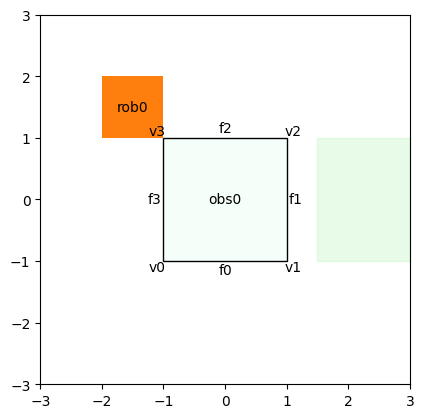

[-1.5 -1.5] 7.999999999999996 (("('NC|obs0_f2-rob0_f0',)", "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f0-rob0_f2',)"), "('NC|obs0_f0-rob0_f2',)")


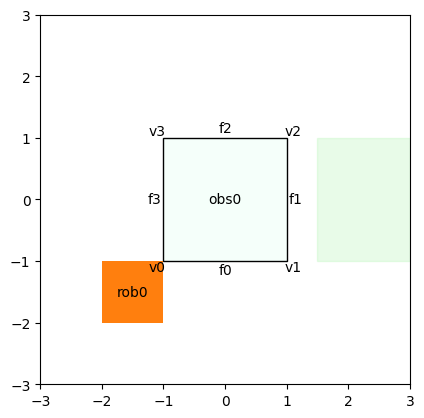

[-2. -2.] 7.999999999999996 (('source', "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f0-rob0_f2',)"), 'source')


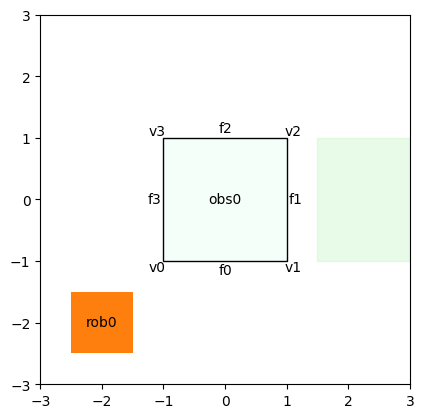

[-2. -2.] 7.999999999999996 (('source', "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f0-rob0_f2',)"), "('NC|obs0_f0-rob0_f2',)")


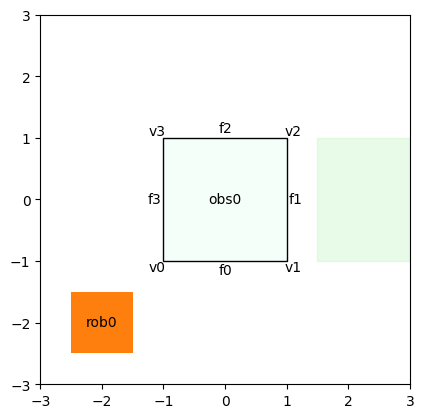

[-2. -2.] 7.999999999999996 (('source', "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)"), 'source')


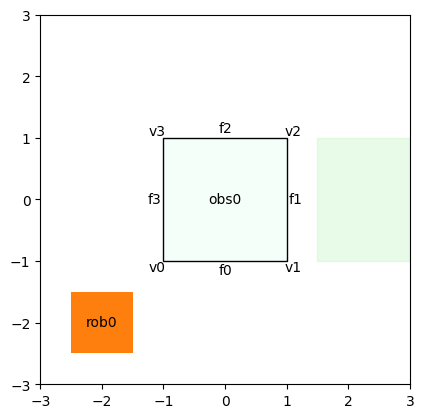

[-2.   1.5] 7.999999999999996 (('source', "('NC|obs0_f3-rob0_f1',)", "('NC|obs0_f2-rob0_f0',)"), "('NC|obs0_f2-rob0_f0',)")


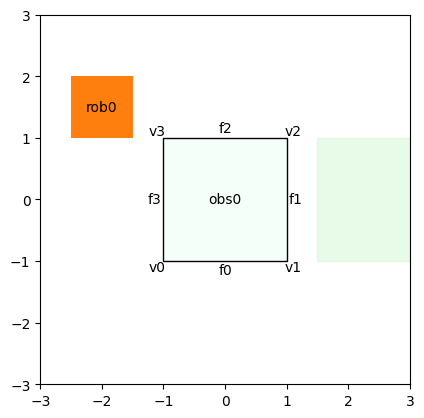

In [16]:
# sort vertices by cost
# 
for v, c in sorted_vertices:
    pos = lbg._vertices[v].point
    cg.plot(show_source=False)
    cg.robots[0].plot_at_position(pos)
    
    print(lbg._vertices[v].point, c, v)
    plt.show()


In [17]:
len([c for c in lbg._edges.values() if c==0])

130